# Coding Exercises (Part 8)

## Complete Data Workflow A-Z: Cleaning Data

### Exercise 11: Cleaning messy Data

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

__Import__ the cars dataset from the csv-file __cars_unclean.csv__ and inspect. Then, __clean up__ the dataset:

- Identify and handle __inconsistent data__
- Each column/feature should have the __appropriate/most functional datatype__
- Identify and handle __missing values__
- Identify and handle __duplicates__
- Have a closer look into columns with __strings__ and clean up
- Identify and handle __erroneous outliers__ in numerical columns
(hint: there might be a "fat finger" issue in one column and some value(s) in the mpg column could be in "gallons per mile" units)
- __Save and export__ the cleaned dataset in a new csv-file (cars_clean.csv)
- Change the datatype of appropriate columns to __categorical__.

--------------------------

In [1]:
import pandas as pd

car_unclean = pd.read_csv("cars_unclean.csv")

In [2]:
car_unclean.isna().sum(axis = 0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [3]:
car_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
mpg             329 non-null float64
cylinders       329 non-null int64
displacement    329 non-null float64
horsepower      329 non-null object
weight          329 non-null int64
acceleration    329 non-null float64
model year      329 non-null int64
origin          329 non-null object
name            329 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 23.3+ KB


In [4]:
car_unclean.isna().any(axis = 1)

0      False
1      False
2      False
3      False
4      False
       ...  
324    False
325    False
326    False
327    False
328    False
Length: 329, dtype: bool

In [5]:
import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
car_unclean.horsepower = car_unclean.horsepower.str.replace("hp", "")

In [7]:
car_unclean.horsepower

0      130.0 
1      165.0 
2      150.0 
3      150.0 
4      140.0 
        ...  
324    198.0 
325     83.0 
326    100.0 
327    152.0 
328    110.0 
Name: horsepower, Length: 329, dtype: object

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [8]:
# run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# run the cell!
cars = pd.read_csv("cars_unclean.csv")

__Inspect__ the DataFrame and identify obviously __inconsistent data__!

In [10]:
# run the cell!
cars.head(20)

mpg  cylinders  displacement horsepower  weight  acceleration  \
0   18.0          8         307.0   130.0 hp    3504          12.0   
1   15.0          8         350.0   165.0 hp    3693          11.5   
2   18.0          8         318.0   150.0 hp    3436          11.0   
3   16.0          8         304.0   150.0 hp    3433          12.0   
4   17.0          8         302.0   140.0 hp    3449          10.5   
5   15.0          8         429.0   198.0 hp    4341          10.0   
6   14.0          8         454.0   220.0 hp    4354           9.0   
7   14.0          8         440.0   215.0 hp    4312           8.5   
8   14.0          8         455.0   225.0 hp    4425          10.0   
9   15.0          8         390.0   190.0 hp    3850           8.5   
10  15.0          8         383.0   170.0 hp    3563          10.0   
11  14.0          8         340.0   160.0 hp    3609           8.0   
12  15.0          8         400.0   150.0 hp    3761           9.5   
13  14.0          8         455.0   225.0 hp    3086          10.0   
14  22.0          6         198.0    95.0 hp    2833          15.5   
15  18.0          6         199.0    97.0 hp    2774          15.5   
16  21.0          6         200.0    85.0 hp    2587          16.0   
17  26.0          4          97.0    46.0 hp    1835          20.5   
18  25.0          4         110.0    87.0 hp    2672          17.5   
19  24.0          4         107.0    90.0 hp    2430          14.5   

    model year         origin                          name  
0           70  United States    chevrolet chevelle malibu   
1           70  United States            buick skylark 320   
2           70  United States           plymouth satellite   
3           70            usa                amc rebel sst   
4           70            usa                  FORD TORINO   
5           70            usa             FORD GALAXIE 500   
6           70            usa             chevrolet impala   
7           70            usa            plymouth fury iii   
8           70            usa             pontiac catalina   
9           70            usa           amc ambassador dpl   
10          70            usa          dodge challenger se   
11          70            usa           plymouth 'cuda 340   
12          70            usa        chevrolet monte carlo   
13          70            usa      buick estate wagon (sw)   
14          70            usa              plymouth duster   
15          70            usa                   amc hornet   
16          70            usa                ford maverick   
17          70         europe         vw 1131 deluxe sedan   
18          70         europe                  peugeot 504   
19          70         europe                  audi 100 ls

In [11]:
# run the cell!
cars.tail(10)

mpg  cylinders  displacement horsepower  weight  acceleration  \
319  25.0          4         104.0    95.0 hp    2375          17.5   
320  14.0          8         340.0   160.0 hp    3609           8.0   
321  13.0          8         360.0   170.0 hp    4654          13.0   
322  16.0          6         258.0   110.0 hp    3632          18.0   
323  24.3          4         151.0    90.0 hp    3003          20.1   
324  12.0          8         429.0   198.0 hp    4952          11.5   
325  27.0          4         101.0    83.0 hp    2202          15.3   
326  17.0          6         250.0   100.0 hp    3329          15.5   
327  14.5          8         351.0   152.0 hp    4215          12.8   
328  25.0          6         181.0   110.0 hp    2945          16.4   

     model year  origin                          name  
319          70  europe                     saab 99e   
320          70     usa           plymouth 'cuda 340   
321          73     usa       plymouth custom suburb   
322          74     usa                  amc matador   
323          80     usa                  amc concord   
324          73     usa     mercury marquis brougham   
325          76  europe                 renault 12tl   
326          71     usa    chevrolet chevelle malibu   
327          76     usa             ford gran torino   
328          82     usa        buick century limited

In [12]:
# run the cell! 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
mpg             329 non-null float64
cylinders       329 non-null int64
displacement    329 non-null float64
horsepower      329 non-null object
weight          329 non-null int64
acceleration    329 non-null float64
model year      329 non-null int64
origin          329 non-null object
name            329 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 23.3+ KB


85. __Identify__ one __column label__ that should be changed and adjust/__rename__ the column label! __Fill in the gaps__!

In [45]:
cars.rename(columns = {"model year" : "model_year"}, inplace = True)

86. Have a closer look to the __origin__ column by analyzing the __frequency/count__ of unique values! Can you find __any inconsistency__?

In [14]:
cars.origin.unique()

array(['United States', 'usa', 'europe'], dtype=object)

There are the values ... usa and United States

87. __Replace__ the value __"United States"__ in the origin column! __Save__ the change!

In [15]:
cars.origin.replace(to_replace = "United States", value = "usa", inplace = True)

Inspect and __identify__ the __problem__ in the column __horsepower__!

In [16]:
# run the cell!
cars.horsepower.head()

0    130.0 hp
1    165.0 hp
2    150.0 hp
3    150.0 hp
4    140.0 hp
Name: horsepower, dtype: object

Datatype should be ... numerical. But first of all, we need to remove...?

88. Apply the appropriate __string operation__ to __remove "hp"__ from the horsepower column! Pay attention to __whitespaces__! __Overwrite__ the horsepower column!

In [25]:
cars.horsepower = cars.horsepower.str.replace("hp", "")

cars.horsepower = cars.horsepower.str.strip()

In [26]:
# run the cell and inspect!
cars.head()

mpg  cylinders  displace horsepower  weight  acceleration  model year  \
0  18.0          8     307.0      130.0    3504          12.0          70   
1  15.0          8     350.0      165.0    3693          11.5          70   
2  18.0          8     318.0      150.0    3436          11.0          70   
3  16.0          8     304.0      150.0    3433          12.0          70   
4  17.0          8     302.0      140.0    3449          10.5          70   

  origin                          name  
0    usa    chevrolet chevelle malibu   
1    usa            buick skylark 320   
2    usa           plymouth satellite   
3    usa                amc rebel sst   
4    usa                  FORD TORINO

Run and inspect, anything __strange__?

In [30]:
# run the cell!
cars.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.0', '97.0', '85.0', '46.0',
       '87.0', '90.0', '113.0', '200.0', '210.0', '193.0',
       'Not available', '100.0', '105.0', '88.0', '175.0', '153.0',
       '180.0', '110.0', '72.0', '86.0', '70.0', '76.0', '60.0', '80.0',
       '54.0', '208.0', '155.0', '112.0', '69.0', '145.0', '137.0',
       '158.0', '167.0', '107.0', '230.0', '49.0', '75.0', '91.0', '83.0',
       '67.0', '78.0', '148.0', '129.0', '71.0', '98.0', '115.0', '81.0',
       '92.0', '79.0', '120.0', '152.0', '52.0', '102.0', '58.0', '96.0',
       '149.0', '89.0', '63.0', '48.0', '66.0', '139.0', '68.0', '103.0',
       '125.0', '133.0', '138.0', '135.0', '142.0', '77.0', '62.0',
       '84.0', '64.0', '65.0', '74.0', '82.0'], dtype=object)

There are 6 entries with the value ... "Not available"

89. Create __"real" missing values__ in the column horsepower! __Save__ the change! __Fill in the gaps__!

In [31]:
cars.horsepower.replace(to_replace = "Not available", value = np.nan, inplace = True) 

90. Now you can __convert the datatype__ in the column __horsepower__! __Overwrite__ the column!

In [32]:
cars.horsepower = cars.horsepower.astype("float")

Inspect!

In [33]:
# run the cell!
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
mpg             329 non-null float64
cylinders       329 non-null int64
displace        329 non-null float64
horsepower      323 non-null float64
weight          329 non-null int64
acceleration    329 non-null float64
model year      329 non-null int64
origin          329 non-null object
name            329 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 23.3+ KB


In [34]:
# run the cell!
cars.head(7)

mpg  cylinders  displace  horsepower  weight  acceleration  model year  \
0  18.0          8     307.0       130.0    3504          12.0          70   
1  15.0          8     350.0       165.0    3693          11.5          70   
2  18.0          8     318.0       150.0    3436          11.0          70   
3  16.0          8     304.0       150.0    3433          12.0          70   
4  17.0          8     302.0       140.0    3449          10.5          70   
5  15.0          8     429.0       198.0    4341          10.0          70   
6  14.0          8     454.0       220.0    4354           9.0          70   

  origin                          name  
0    usa    chevrolet chevelle malibu   
1    usa            buick skylark 320   
2    usa           plymouth satellite   
3    usa                amc rebel sst   
4    usa                  FORD TORINO   
5    usa             FORD GALAXIE 500   
6    usa             chevrolet impala

Any __inconsistencies__ in the column __name__? Inspect one element! 

In [41]:
#run the cell!
cars.loc[4, "name"]

'Ford Torino'

  ford pinto                    6
  amc matador                   6
  ford maverick                 5
  vw rabbit                     5
  chevrolet chevelle malibu     4
                               ..
  mercedes-benz 300d            1
  volvo 264gl                   1
  buick skylark 320             1
  ford fairmont futura          1
  oldsmobile cutlass ls         1
Name: name, Length: 242, dtype: int64

It seems like some names are uppercase, while others are lowercase. And there are some excess whitespaces in the strings.

91. __Convert__ all names to __lowercase__ and __remove all whitespaces__ on the left ends and right ends! __Overwrite!__

In [40]:
cars.name = cars.name.str.strip()

cars.name = cars.name.str.title()


Run the next two cells and identify (erroneous) outliers in the numercial columns!

In [42]:
# run the cell!
cars.describe()

mpg   cylinders    displace  horsepower        weight  \
count  329.000000  329.000000  329.000000  323.000000    329.000000   
mean    21.655199    5.802432  217.004559  111.185759   3229.082067   
std      7.294651    1.719825  104.719009   39.846088   1376.306985   
min      0.060606    4.000000   68.000000   46.000000   1800.000000   
25%     16.000000    4.000000  121.000000   83.500000   2464.000000   
50%     20.200000    6.000000  200.000000  100.000000   3102.000000   
75%     26.000000    8.000000  305.000000  141.000000   3821.000000   
max     44.300000    8.000000  455.000000  230.000000  23000.000000   

       acceleration   model year  
count    329.000000   329.000000  
mean      15.400000   104.495441  
std        2.922756   232.498690  
min        8.000000    70.000000  
25%       13.500000    73.000000  
50%       15.400000    76.000000  
75%       17.000000    79.000000  
max       24.800000  1973.000000

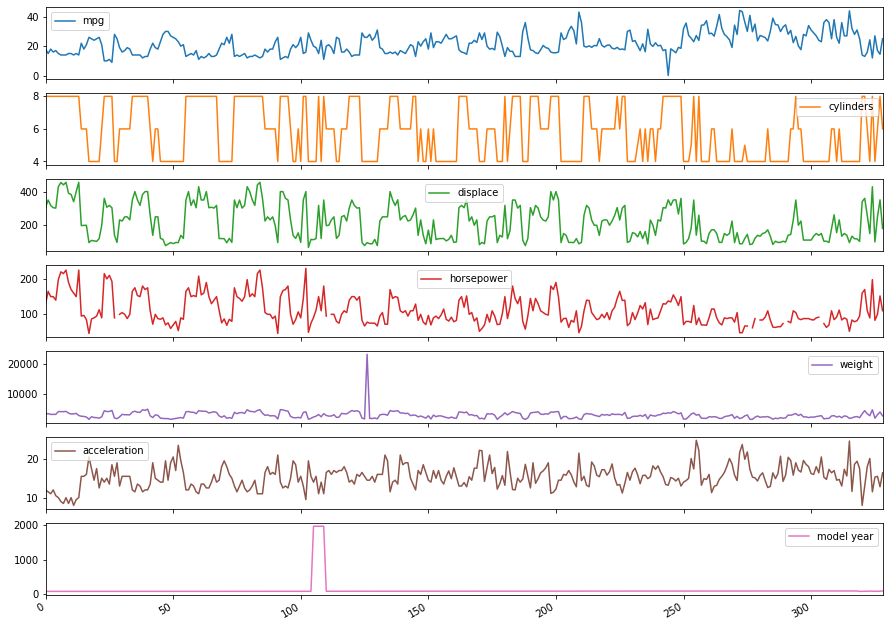

In [43]:
# run the cell!
cars.plot(subplots = True, figsize = (15,12))
plt.show()

92. Inspect the column __model_year__ in more detail by analyzing the __frequency/counts__ of unique values! Anything __strange__?

In [62]:
cars.model_year.value_counts()

73    38
76    32
70    29
78    28
79    27
75    26
71    25
82    23
72    23
77    22
74    22
81    17
80    17
Name: model_year, dtype: int64

There are 5 entries with ... 1973 instead of 73. 

93. __Replace__ the value __1973__! __Save__ the change!

In [58]:
cars.model_year.replace(to_replace= 1973, value = 73, inplace = True)



94. Inspect the column __weight__ by __sorting__ the values from __high to low__. Can you see the __extreme value__?

In [70]:
cars.sort_values(by = 'weight')

mpg  cylinders  displace  horsepower  weight  acceleration  model_year  \
210  36.1          4      98.0        66.0    1800          14.4          78   
177  29.5          4      97.0        71.0    1825          12.2          76   
188  36.0          4      79.0        58.0    1825          18.6          77   
49   27.0          4      97.0        60.0    1834          19.0          71   
17   26.0          4      97.0        46.0    1835          20.5          70   
..    ...        ...       ...         ...     ...           ...         ...   
324  12.0          8     429.0       198.0    4952          11.5          73   
38   12.0          8     383.0       180.0    4955          11.5          71   
92   11.0          8     400.0       150.0    4997          14.0          73   
40   13.0          8     400.0       175.0    5140          12.0          71   
126  26.0          4      97.0        78.0   23000          14.5          74   

     origin                      name  
210     usa               Ford Fiesta  
177  europe                 Vw Rabbit  
188  europe             Renault 5 Gtl  
49   europe              Vw Model 111  
17   europe      Vw 1131 Deluxe Sedan  
..      ...                       ...  
324     usa  Mercury Marquis Brougham  
38      usa         Dodge Monaco (Sw)  
92      usa          Chevrolet Impala  
40      usa       Pontiac Safari (Sw)  
126  europe                Opel Manta  

[329 rows x 9 columns]

The by far highest value is ... 23000 lbs. Must be an error!

95. __Select__ the complete __row__ of the outlier with the method __idxmax()__!

It´s an opel manta ... could be a "fat finger" problem, weight could be 2300 instead of 23000.


96. __Overwrite__ the erroneous outlier! __Fill in the gaps__!

In [ ]:
cars.loc[---, ---] = 2300

Inspect the column __mpg__! Any strange __outlier__?

In [ ]:
# run the cell!
cars.mpg.sort_values()

An mpg of ... 0.060606 cannot be correct...

97. __Select__ the complete __row__ of the outlier with the method __idxmin()__!

98. After some research we have found out that this extreme value is in __"gallons per mile"__ units instead of "miles per gallon". <br>
__Convert__ to __"miles per gallon"__ units! __Fill in the gaps__!

In [ ]:
cars.loc[---, ---] = ---/cars.loc[---, ---]

99. Next, select all __rows__ with at least one __missing__/na value! __Fill in the gaps__!

In [ ]:
cars.loc[cars.---.---]

There are 6 cars, where the horsepower is unknown.

100. As horsepower is an important feature in the cars dataset, we decide to remove all 6 rows. __Remove__ and __save__ the change!

Now let´s find __duplicates__. First, we need to understand __which columns__ we have to take into consideration to identify duplicates.

101. The first __naive assumption__ is that two cars cannot have the __same name__. Let´s count the number of __name-duplicates__. __Fill in the gaps__!

In [ ]:
cars.duplicated(--- = [---]).sum()

There are ... 86 potential duplicates to remove.

102. Let´s inspect the __duplicated pairs__ by selecting __all instances__ of a name duplicate! __Fill in the gaps__! <br>
Should the __name__ be the __only criteria__ to identify duplicates?

In [ ]:
cars.loc[cars.duplicated(--- = [---], --- = False)].sort_values("name")

No! Cars can have several vintages/model_year and several variants with different technical specifications (e.g. weight, horsepower)  

103. To be on the safe side, let´s include __all columns__ to identify duplicates. __Count__ the number of duplicates! __Fill in the gaps__!

In [ ]:
cars.---.---

There are ... 10 potential duplicates.

104. Let´s inspect the __duplicated pairs__ by selecting __all instances__ of a duplicate! __Fill in the gaps__!

In [ ]:
cars.loc[cars.duplicated(---)].sort_values("name")

All pairs seem to be real duplicates.

105. __Drop one instance__ of each duplicated pair! __Save__ the change!

In [ ]:
# run the cell
cars.head()

In [ ]:
# run the cell!
cars.info()

106. Our dataset seems to be pretty clean now! __Save__ and __export__ to a new csv-file (cars_clean.csv)! Do not export the RangeIndex!

Call the __describe()__ method on all __non-numerical columns__!

In [ ]:
# run the cell!
cars.describe(include = "O")

Are there any __categorical features__ (only few unique values) where the datatype could be __converted to "category"__? <br>
107. If so, __convert__ and __overwrite__ the column(s)!

__Inspect__. Did we __reduce memory usage__?

In [ ]:
#run the cell!
cars.info()

Yes, we reduced memory usage!

# Well Done!

-----------------------------------------

# Hints (Spoiler!)

85. rename() method, column "model year"

86. value_counts() method

87. replace() method

88. string(str) method replace(), " hp"

89. replace() method, np.nan

90. astype() method, "float"

91. string(str) methods lower() and strip()

92. value_counts() method

93. replace() method

94. sort_values() method

95. Filter cars with cars.weight.idxmax()

96. cars.weight.idxmax(), "weight"

97. Filter cars with cars.mpg.idxmin()

98. cars.mpg.idxmin(), "mpg", 1/x

99. methods isna() and any()

100. dropna() method

101. subset parameter, "name"

102. keep parameter

103. methods duplicated() and sum()

104. keep parameter

105. drop_duplicates() method

106. to_csv() method

107. astype() method